In [1]:
import pandas as pd
import h5py
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from pylab import rcParams
from datetime import datetime
import matplotlib.ticker as plticker
import matplotlib.dates as mdates

from sklearn.decomposition import PCA
from sklearn.cluster import SpectralClustering
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

rcParams['figure.figsize'] =20,10
rcParams['legend.fontsize'] = 20
font = {'family' : 'Times New Roman','weight' : "light", 'size'   : 20}
plt.rc('font', **font)

In [46]:
datelist = pd.date_range(start="2017-03-02", end="2018-02-17").strftime("%Y-%m-%d").astype(str).to_list()
#datelist = pd.date_range(start="2017-03-02", end="2017-04-30").strftime("%Y-%m-%d").astype(str).to_list()

#datelist = ["2017-03-02"]

In [47]:
rmsi_all_p1 = pd.DataFrame()
shi_all_p1 = pd.DataFrame()
rmsi_all_p2 = pd.DataFrame()
shi_all_p2 = pd.DataFrame()
rmsi_all_p3 = pd.DataFrame()
shi_all_p3 = pd.DataFrame()

for date in datelist:
    rmsi_all_p1 = rmsi_all_p1.append(pd.read_pickle("E:\\resampled_phasevise\\rmsi\\" + date + "_rmsi_10min_mean_p1.p"))
    shi_all_p1 = shi_all_p1.append(pd.read_pickle("E:\\resampled_phasevise\\i\\" + date + "_harmonics10min_i_max_p1.p"))
    
    rmsi_all_p2 = rmsi_all_p2.append(pd.read_pickle("E:\\resampled_phasevise\\rmsi\\" + date + "_rmsi_10min_mean_p2.p"))
    shi_all_p2 = shi_all_p2.append(pd.read_pickle("E:\\resampled_phasevise\\i\\" + date + "_harmonics10min_i_max_p2.p"))
    
    rmsi_all_p3 = rmsi_all_p3.append(pd.read_pickle("E:\\resampled_phasevise\\rmsi\\" + date + "_rmsi_10min_mean_p3.p"))
    shi_all_p3 = shi_all_p3.append(pd.read_pickle("E:\\resampled_phasevise\\i\\" + date + "_harmonics10min_i_max_p3.p"))

In [48]:
shi_all_p1.insert(0,"rmsi",rmsi_all_p1)

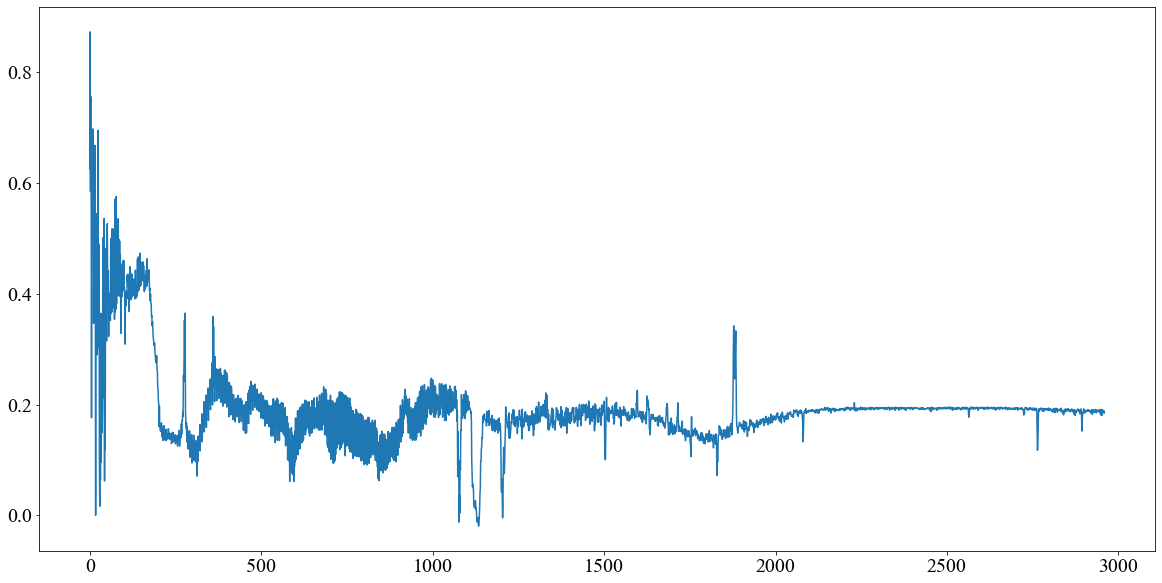

In [49]:
correlation = shi_all_p1[shi_all_p1.columns[:]].corr()["rmsi"][1:]
plt.plot(correlation)

In [50]:
def generateXAxisData():
    return np.linspace(2000, 149950, 2960)

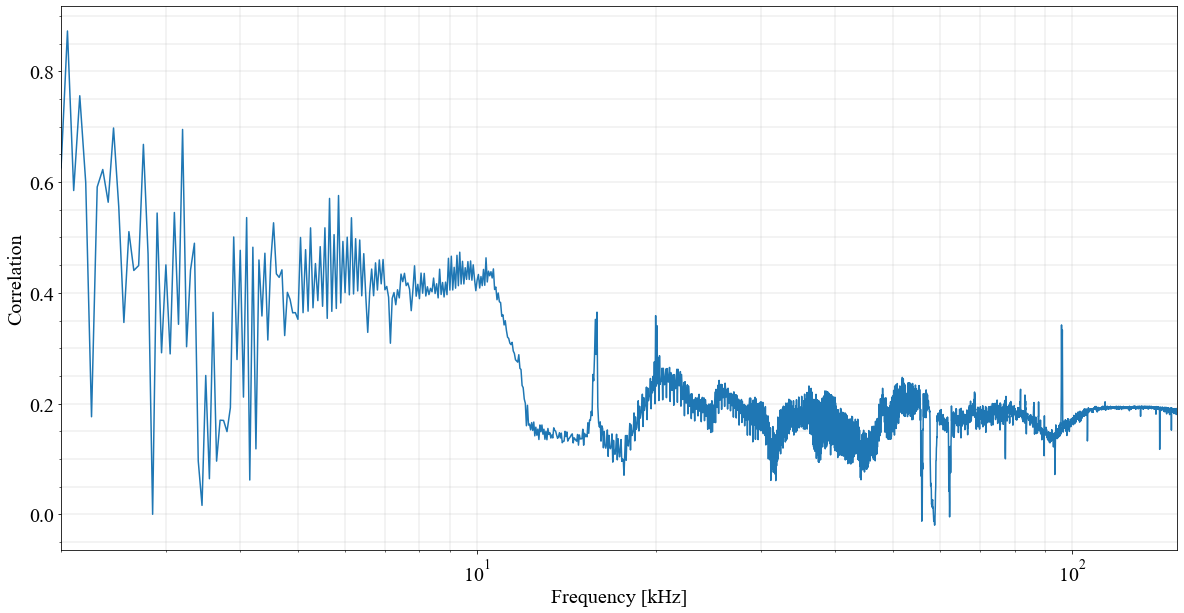

In [54]:
x = generateXAxisData()/1000

fig, ax = plt.subplots()

ax.plot(x, correlation)

ax.set_xlim(min(x), max(x))
ax.minorticks_on()
ax.grid(linewidth=0.3, which='both')
ax.set_xlabel("Frequency [kHz]")
ax.set_ylabel('Correlation')
ax.set_xscale('log')


In [55]:
# NOW FOR THE BUCKETS

In [57]:
mask = rmsi_all_p1<2
shi_2A = shi_all_p1.loc[mask[0]]

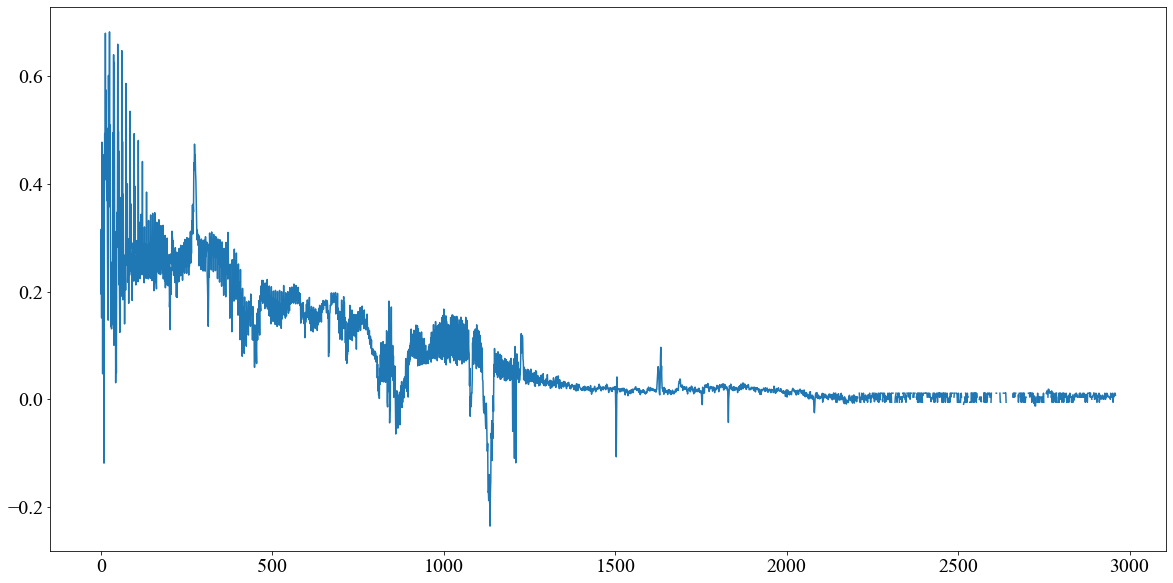

In [59]:
correlation2A = shi_2A[shi_2A.columns[:]].corr()["rmsi"][1:]
plt.plot(correlation2A)

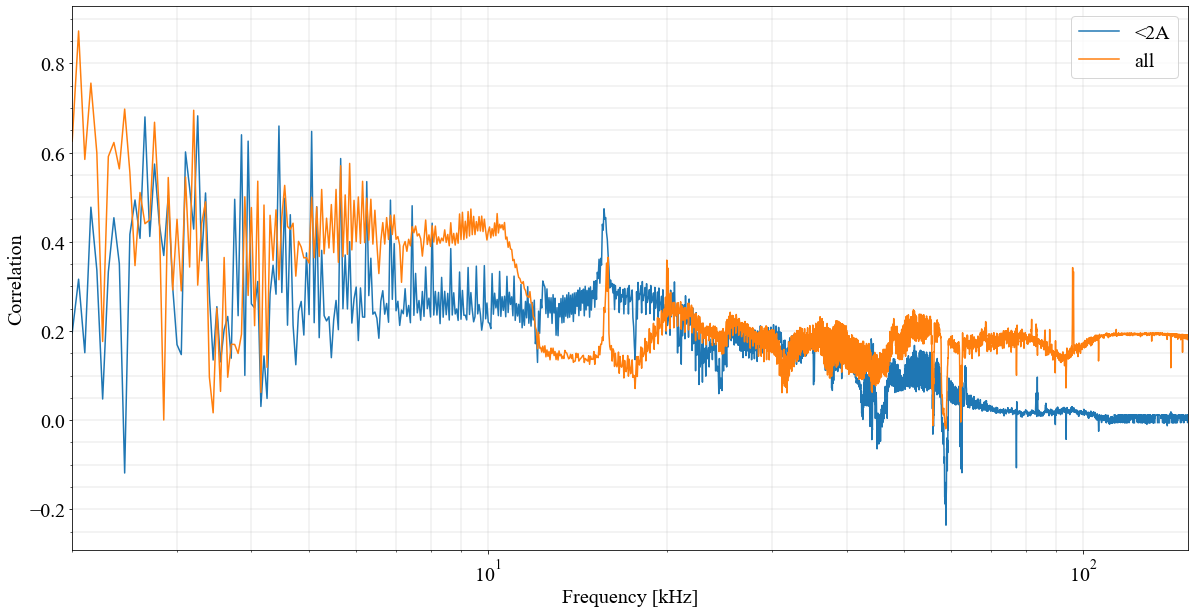

In [62]:
x = generateXAxisData()/1000

fig, ax = plt.subplots()

ax.plot(x, correlation2A ,label="<2A")
ax.plot(x, correlation ,label="all")


ax.set_xlim(min(x), max(x))
ax.minorticks_on()
ax.grid(linewidth=0.3, which='both')
ax.set_xlabel("Frequency [kHz]")
ax.set_ylabel('Correlation')
ax.set_xscale('log')
ax.legend()

In [71]:
mask = (rmsi_all_p1 < 16) & (rmsi_all_p1 >14)
shi_1416A = shi_all_p1.loc[mask[0]]

In [73]:
correlation1416A = shi_1416A[shi_1416A.columns[:]].corr()["rmsi"][1:]

In [75]:
mask = (rmsi_all_p1 < 32) & (rmsi_all_p1 >28)
shi_2832A = shi_all_p1.loc[mask[0]]
correlation2832A = shi_2832A[shi_2832A.columns[:]].corr()["rmsi"][1:]

In [76]:
mask = (rmsi_all_p1 < 47) & (rmsi_all_p1 >43)
shi_4347A = shi_all_p1.loc[mask[0]]
correlation4347A = shi_4347A[shi_4347A.columns[:]].corr()["rmsi"][1:]

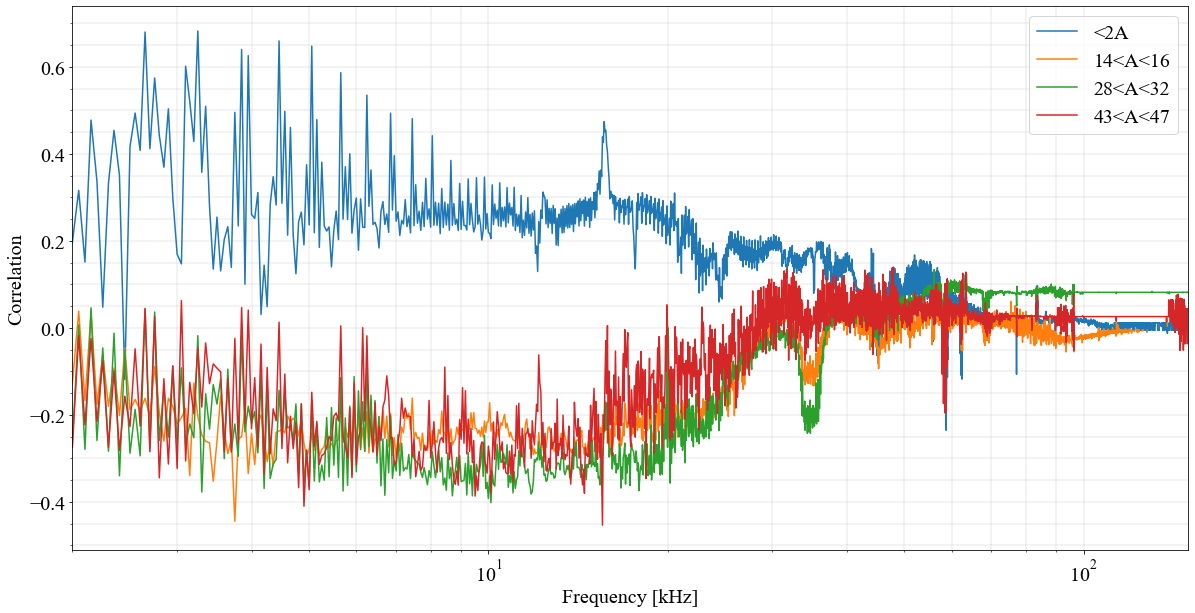

In [78]:
x = generateXAxisData()/1000

fig, ax = plt.subplots()

ax.plot(x, correlation2A ,label="<2A")
ax.plot(x, correlation1416A ,label="14<A<16")
ax.plot(x, correlation2832A ,label="28<A<32")
ax.plot(x, correlation4347A ,label="43<A<47")

ax.set_xlim(min(x), max(x))
ax.minorticks_on()
ax.grid(linewidth=0.3, which='both')
ax.set_xlabel("Frequency [kHz]")
ax.set_ylabel('Correlation')
ax.set_xscale('log')
ax.legend()

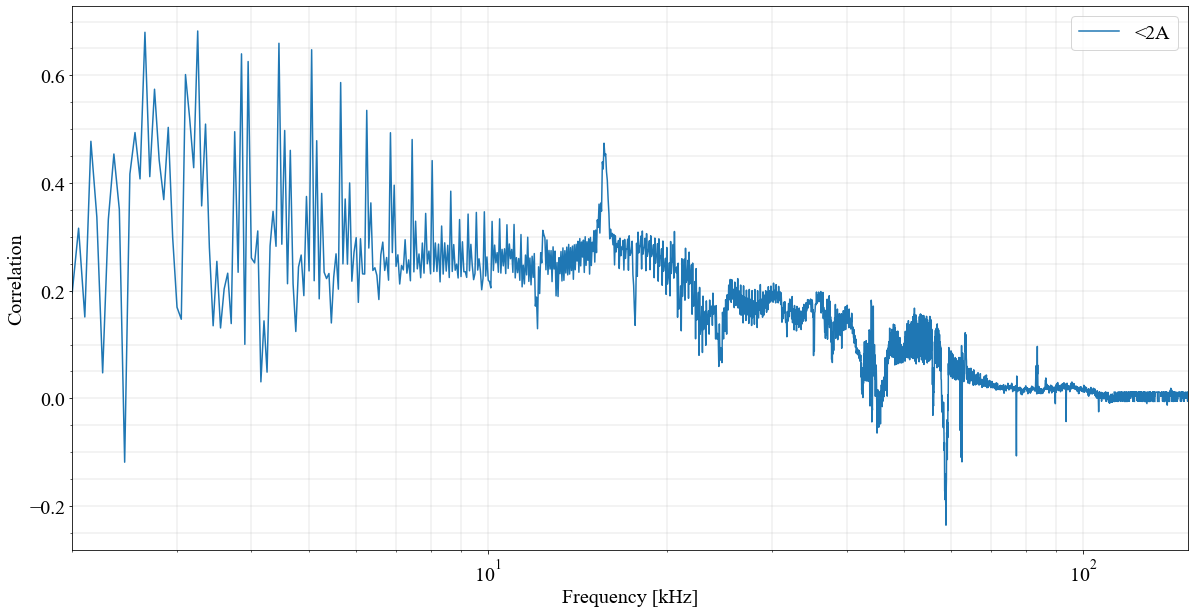

In [79]:
x = generateXAxisData()/1000

fig, ax = plt.subplots()

ax.plot(x, correlation2A ,label="<2A")

ax.set_xlim(min(x), max(x))
ax.minorticks_on()
ax.grid(linewidth=0.3, which='both')
ax.set_xlabel("Frequency [kHz]")
ax.set_ylabel('Correlation')
ax.set_xscale('log')
ax.legend()

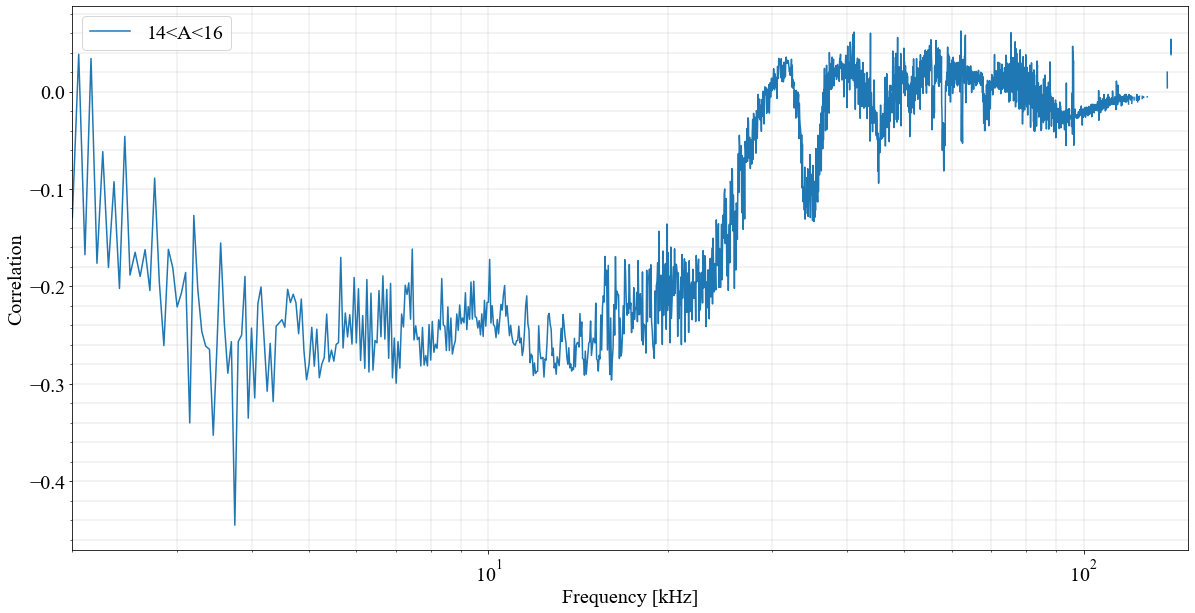

In [80]:
x = generateXAxisData()/1000

fig, ax = plt.subplots()


ax.plot(x, correlation1416A ,label="14<A<16")


ax.set_xlim(min(x), max(x))
ax.minorticks_on()
ax.grid(linewidth=0.3, which='both')
ax.set_xlabel("Frequency [kHz]")
ax.set_ylabel('Correlation')
ax.set_xscale('log')
ax.legend()

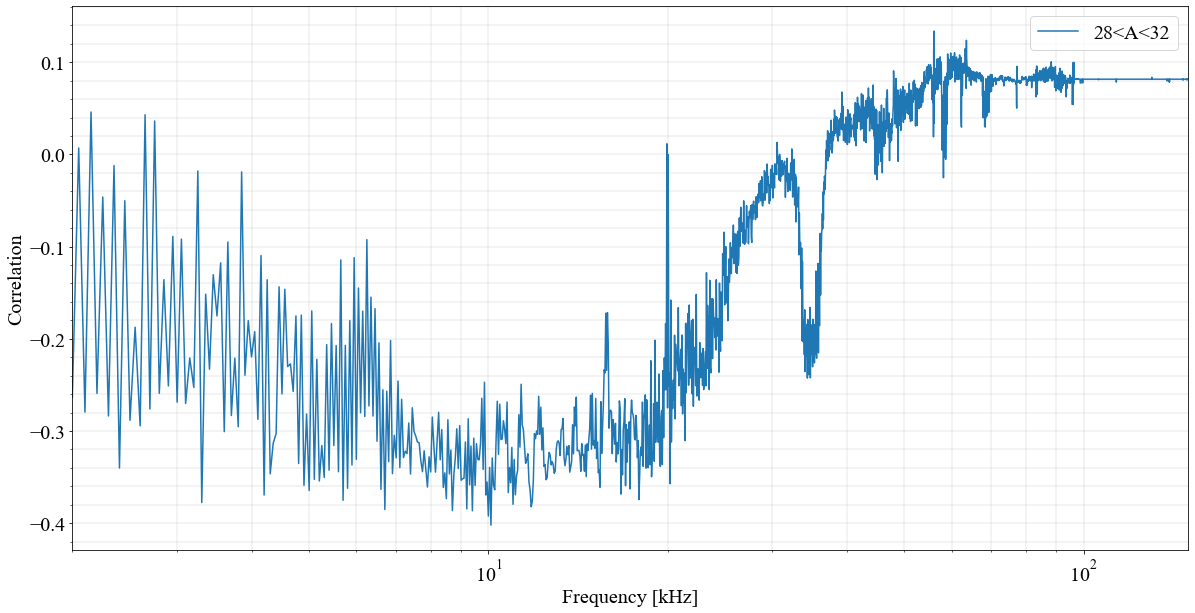

In [81]:
x = generateXAxisData()/1000

fig, ax = plt.subplots()


ax.plot(x, correlation2832A ,label="28<A<32")


ax.set_xlim(min(x), max(x))
ax.minorticks_on()
ax.grid(linewidth=0.3, which='both')
ax.set_xlabel("Frequency [kHz]")
ax.set_ylabel('Correlation')
ax.set_xscale('log')
ax.legend()

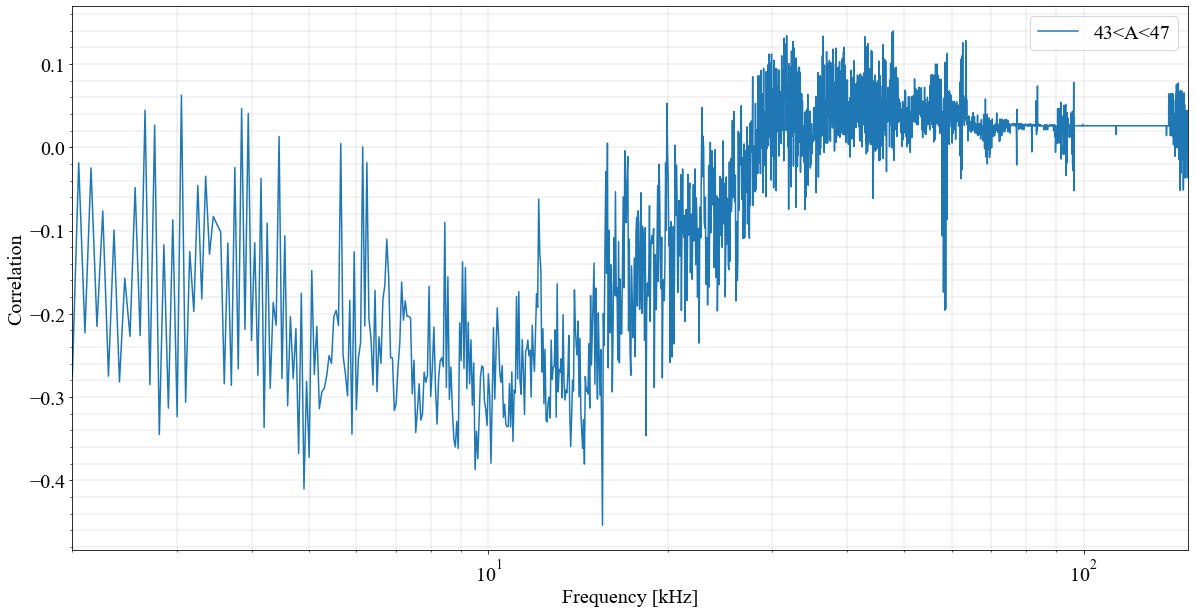

In [82]:
x = generateXAxisData()/1000

fig, ax = plt.subplots()

ax.plot(x, correlation4347A ,label="43<A<47")

ax.set_xlim(min(x), max(x))
ax.minorticks_on()
ax.grid(linewidth=0.3, which='both')
ax.set_xlabel("Frequency [kHz]")
ax.set_ylabel('Correlation')
ax.set_xscale('log')
ax.legend()

In [102]:
shi_mean = shi_2A.drop(['rmsi'], axis=1).mean()

In [97]:
shi_mean *= correlation2A

In [99]:
def levels_dbmyA(Aout):
    """ calcs the voltage levels
    / replaces 0 with 1e-3
    / dBμV = 20log₁₀(VOUT/1μV) where VOUT in μV
    / 1V = 120dbmyV
    /dBμV or dBuV (decibel microvolt, amplitude ratio) — absolute voltage in decibels relative to one microvolt, 
    used to measure the signal strength in RF and audio cables. That is dBμV = 20log₁₀(VOUT/1μV) where VOUT in μV. This shows that dBμV is independent of impedance. Since it is the ratio of two voltages, they can be measured as peak-to-peak or RMS and with the same units. Reference voltage 1 μV.
    """
    a = np.array(Aout.values.tolist())
    Aout = pd.DataFrame(np.where(a < 1e-6, 1e-6, a).tolist())

    Aout = Aout/1e-6
    Aout = np.log10(Aout)
    Aout = Aout*20
    return Aout

In [103]:
shi_mean_db = levels_dbmyA(shi_mean)

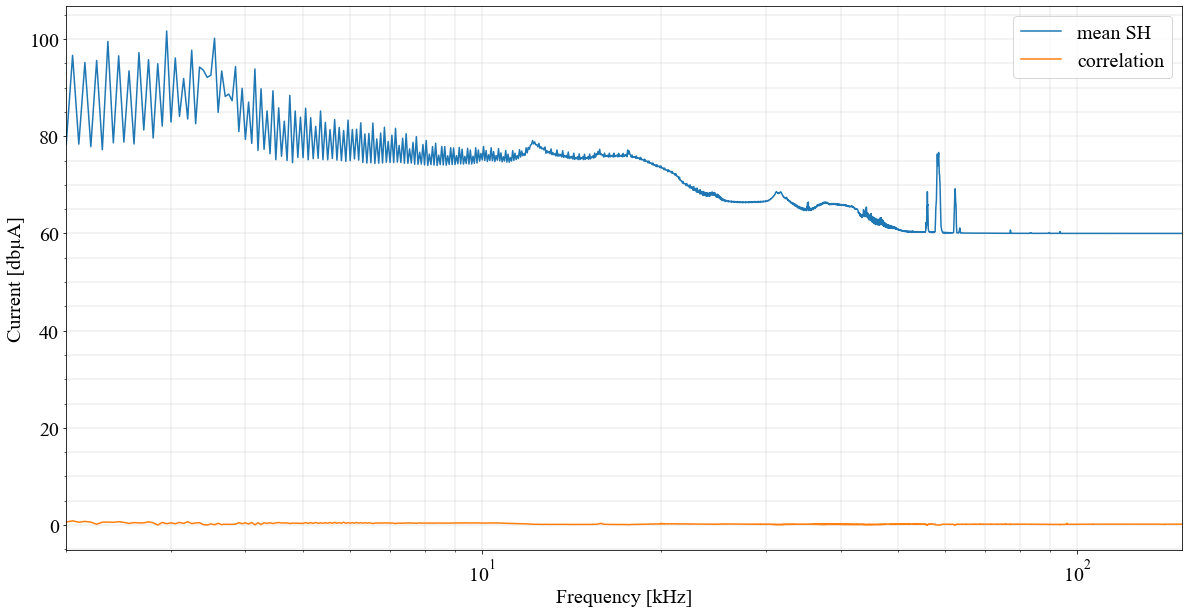

In [104]:
x = generateXAxisData()/1000


fig, ax = plt.subplots()

ax.plot(x, shi_mean_db, label="mean SH")
ax.plot(x, correlation, label="correlation")



ax.set_xlim(min(x), max(x))
ax.minorticks_on()
ax.grid(linewidth=0.3, which='both')
ax.set_xlabel("Frequency [kHz]")
ax.set_ylabel('Current [dbµA]')
ax.set_xscale('log')
ax.legend()

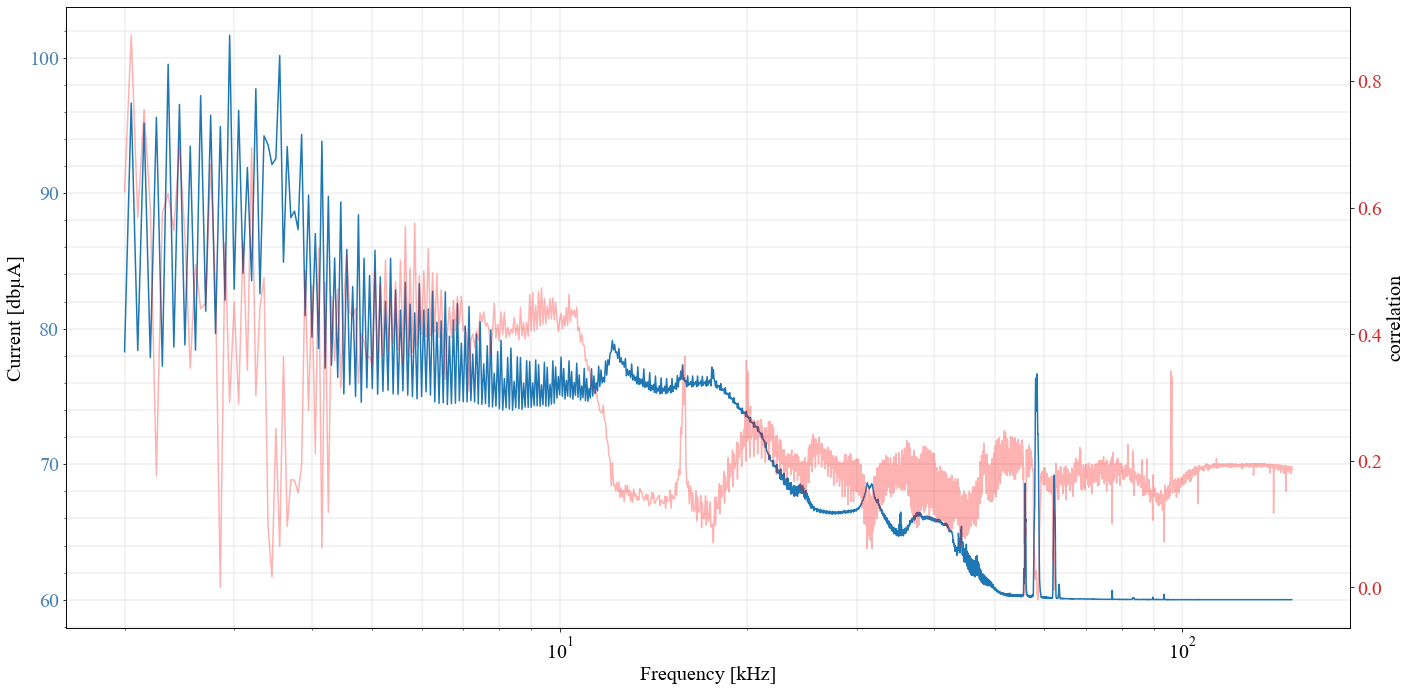

In [113]:
fig, ax1 = plt.subplots()

x = generateXAxisData()/1000

color = 'tab:red'
ax1.set_xlabel("Frequency [kHz]")
ax1.set_ylabel('Current [dbµA]')
ax1.plot(x, shi_mean_db, label="mean SH")
ax1.set_xscale('log')
ax1.tick_params(axis='y', labelcolor='steelblue')
ax1.minorticks_on()
ax1.grid(linewidth=0.3, which='both')


ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel('correlation')  # we already handled the x-label with ax1
ax2.plot(x, correlation, color='red', label="correlation", alpha=0.3)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()